In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Test function

In [2]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [3]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 1
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=1)
print(X)

[('x0',), ('x1',)]
[[1.   0.   0.  ]
 [1.   0.25 0.  ]
 [1.   0.5  0.  ]
 [1.   0.75 0.  ]
 [1.   1.   0.  ]
 [1.   0.   0.25]
 [1.   0.25 0.25]
 [1.   0.5  0.25]
 [1.   0.75 0.25]
 [1.   1.   0.25]
 [1.   0.   0.5 ]
 [1.   0.25 0.5 ]
 [1.   0.5  0.5 ]
 [1.   0.75 0.5 ]
 [1.   1.   0.5 ]
 [1.   0.   0.75]
 [1.   0.25 0.75]
 [1.   0.5  0.75]
 [1.   0.75 0.75]
 [1.   1.   0.75]
 [1.   0.   1.  ]
 [1.   0.25 1.  ]
 [1.   0.5  1.  ]
 [1.   0.75 1.  ]
 [1.   1.   1.  ]]


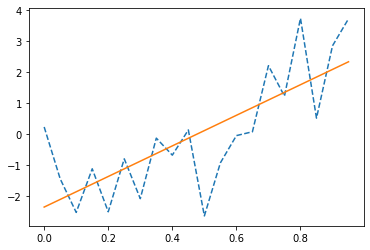

In [4]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 1)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

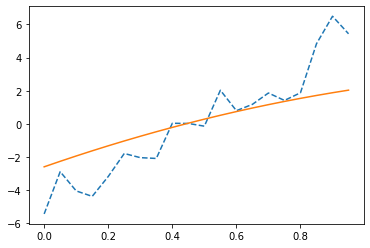

In [5]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
znoisy_tilde, X, noise = ols_fp(xvec = xvec, f = test_func, p=2)
znoisy = z + noise
znoisy_centered = znoisy-np.mean(znoisy)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


(10, 10)
(10, 10)


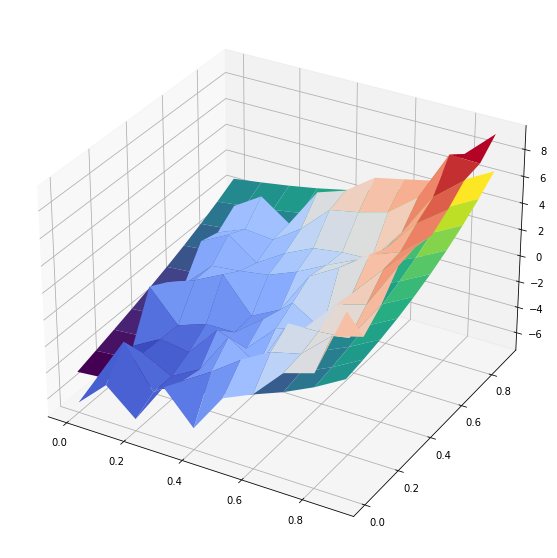

In [6]:
#%matplotlib qt
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y
xvec = np.array([x, y])
z = test_func(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X, noise = ols_fp(xvec = xvec, f = test_func_2, p=3)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy = z + noise.reshape(x.shape)
znoisy_centered = znoisy-np.mean(znoisy)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde-np.mean(znoisy_tilde), cmap=cm.viridis)
ax.plot_surface(x,y,znoisy_centered, cmap=cm.coolwarm)

# Franke function

(20, 20)
(20, 20)


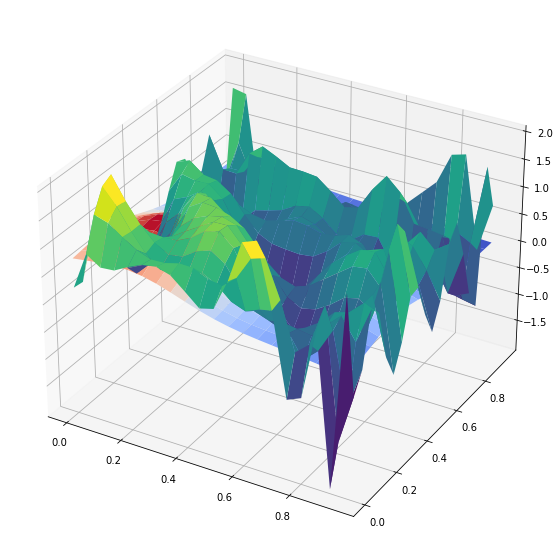

In [7]:
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X, znoisy_centered = ols_fp(xvec = xvec, f = FrankeFunction, p=20)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy_centered.reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde + np.mean(z), cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
#ax.plot_surface(x,y,znoisy_centered, cmap=cm.coolwarm)